In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import ast

In [2]:
cars=pd.read_csv('used_cars_data.csv',nrows=1000000, usecols=['back_legroom','daysonmarket','front_legroom','fuel_tank_volume',
'height','horsepower','latitude','length','longitude','major_options','maximum_seating','mileage','owner_count','savings_amount',
'seller_rating','wheelbase','width','year','price'])

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cars.head(4)

,back_legroom,daysonmarket,front_legroom,fuel_tank_volume,height,horsepower,latitude,length,longitude,major_options,maximum_seating,mileage,owner_count,price,savings_amount,seller_rating,wheelbase,width,year
0,35.1 in,522,41.2 in,12.7 gal,66.5 in,177.0,18.3988,166.6 in,-66.1582,['Quick Order Package'],5 seats,7.0,NaN,23141.0,0,2.8,101.2 in,79.6 in,2019
1,38.1 in,207,39.1 in,17.7 gal,68 in,246.0,18.4439,181 in,-66.0785,['Adaptive Cruise Control'],7 seats,8.0,NaN,46500.0,0,3.0,107.9 in,85.6 in,2020
2,35.4 in,1233,43.3 in,15.9 gal,58.1 in,305.0,18.3467,180.9 in,-66.1098,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",5 seats,NaN,3.0,46995.0,0,NaN,104.3 in,78.9 in,2016
3,37.6 in,196,39 in,23.5 gal,73 in,340.0,18.4439,195.1 in,-66.0785,NaN,7 seats,11.0,NaN,67430.0,0,3.0,115 in,87.4 in,2020


In [4]:
# Format major_options to turn list to #elements
def format_major_options(options):
    if pd.isnull(options):
        return 0
    else:
        return options.count(',') + 1
cars['major_options'] = cars['major_options'].apply(format_major_options)

In [5]:
def remove_unit(x):
    if (isinstance(x, str)):
        if x == '--':
            return np.NaN
        number = x.replace(' in', '')
        number = number.replace(' gal', '')
        number = number.replace(' seats', '')
        return float(number)
    else:
        return x
    
def text_to_float(cols, df):
    for col in cols:
        df[col] = df[col].apply(lambda x: remove_unit(x))
        df[col] = df[col].fillna(df[col].mean())

    return df

In [6]:
columns_to_be_changed=["height","fuel_tank_volume","front_legroom","length",'back_legroom','maximum_seating','wheelbase','width']
df=cars.copy()

df = text_to_float(columns_to_be_changed, df)


In [7]:
## Replace NaN by mean
nan_to_mean = [ 'horsepower', 'mileage','seller_rating', 'owner_count']
for col in nan_to_mean:
    df[col] = df[col].fillna(df[col].mean())


In [8]:
df.head()

,back_legroom,daysonmarket,front_legroom,fuel_tank_volume,height,horsepower,latitude,length,longitude,major_options,maximum_seating,mileage,owner_count,price,savings_amount,seller_rating,wheelbase,width,year
0,35.1,522,41.2,12.7,66.5,177.0,18.3988,166.6,-66.1582,1,5.0,7.000000,1.49876,23141.0,0,2.800000,101.2,79.6,2019
1,38.1,207,39.1,17.7,68.0,246.0,18.4439,181.0,-66.0785,1,7.0,8.000000,1.49876,46500.0,0,3.000000,107.9,85.6,2020
2,35.4,1233,43.3,15.9,58.1,305.0,18.3467,180.9,-66.1098,4,5.0,31491.992027,3.00000,46995.0,0,4.258001,104.3,78.9,2016
3,37.6,196,39.0,23.5,73.0,340.0,18.4439,195.1,-66.0785,0,7.0,11.000000,1.49876,67430.0,0,3.000000,115.0,87.4,2020
4,38.1,137,39.1,17.7,68.0,246.0,18.4439,181.0,-66.0785,1,7.0,7.000000,1.49876,48880.0,0,3.000000,107.9,85.6,2020


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time


def fit(X, y):
    
    START = time.time()
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)


    lr = DecisionTreeRegressor(random_state=0).fit(X, y)
    
    END = time.time()

    print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
    print("Validation set score: {:.7f}".format(lr.score(X_val, y_val)))
    print("Validation set MSE: ", mean_squared_error(y_val, lr.predict(X_val)))
    
    return (END - START)

def linear(X,y):
    
    START = time.time()
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    
    END = time.time()

    print("\nTraining set score (linear): {:.2f}".format(lm.score(X_train, y_train)))
    print("Validation set score (linear): {:.7f}".format(lm.score(X_val, y_val)))
    print("Validation set MSE (linear): ", mean_squared_error(y_val, lm.predict(X_val)))
    
    return (END - START)

In [13]:
y = df['price']
df.drop(['price'],axis=1, inplace=True)
to_plot_x = []
to_plot_y = []
linear_plot_y=[]
linear_plot_x=[]

i=0
j=100000

for junk in range(10):
    
    X = df.iloc[i:j].to_numpy()
    duration = fit(X, y[i:j].to_numpy())
    duration_l = linear(X, y[i:j].to_numpy())
    
    print('\nDuration: ' + str(duration) + ' seconds \n\n')
    print('Duration(linear): ' + str(duration_l) + ' seconds \n\n')

    
    to_plot_y.append(duration)
    to_plot_x.append(len(X))
    linear_plot_y.append(duration_l)
    linear_plot_x.append(len(X))    

    j=j+100000

Training set score: 1.00
Validation set score: 0.9947654
Validation set MSE:  2434105.3848843924

Training set score (linear): 0.56
Validation set score (linear): 0.5183824
Validation set MSE (linear):  223954677.9521635

Duration: 3.6365182399749756 seconds 


Duration(linear): 0.11281967163085938 seconds 


Training set score: 1.00
Validation set score: 0.9976487
Validation set MSE:  1354706.7654173782

Training set score (linear): 0.47
Validation set score (linear): 0.4312677
Validation set MSE (linear):  327679671.08409274

Duration: 7.98461389541626 seconds 


Duration(linear): 0.26547718048095703 seconds 


Training set score: 1.00
Validation set score: 0.9964989
Validation set MSE:  1463898.54115179

Training set score (linear): 0.45
Validation set score (linear): 0.5424807
Validation set MSE (linear):  191299640.85375136

Duration: 12.538735628128052 seconds 


Duration(linear): 0.454709529876709 seconds 


Training set score: 1.00
Validation set score: 0.9968058
Validation set

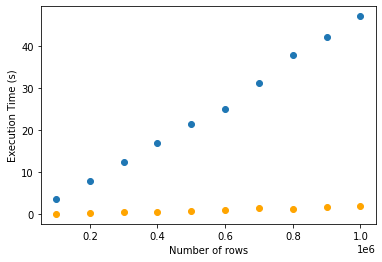

In [15]:
import matplotlib.pyplot as plt


plt.scatter(linear_plot_x, linear_plot_y, c='orange')
plt.scatter(to_plot_x, to_plot_y,)

plt.xlabel('Number of rows')
plt.ylabel('Execution Time (s)')

plt.show()

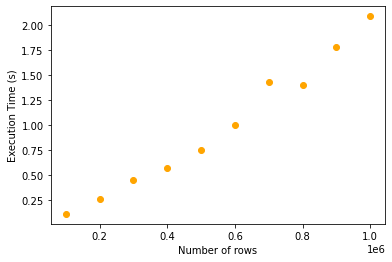

In [17]:
import matplotlib.pyplot as plt


plt.scatter(linear_plot_x, linear_plot_y, c='orange')

plt.xlabel('Number of rows')
plt.ylabel('Execution Time (s)')

plt.show()


In [22]:
EXECUTION_ROUNDS = 3
x_results = []
x_linear_results = []
y_linear_results=[]
y_results = []
for j in range(0, EXECUTION_ROUNDS): # execute multiple times so we can take average and standard deviation
    to_plot_x = []
    to_plot_y = []
    linear_plot_y=[]
    linear_plot_x=[]

    i=0
    j=100000

    for junk in range(10):
    
        X = df.iloc[i:j].to_numpy()
        duration = fit(X, y[i:j].to_numpy())
        duration_l = linear(X, y[i:j].to_numpy())
    
        print('\nDuration: ' + str(duration) + ' seconds \n\n')
        print('Duration(linear): ' + str(duration_l) + ' seconds \n\n')

    
        to_plot_y.append(duration)
        to_plot_x.append(len(X))
        linear_plot_y.append(duration_l)
        linear_plot_x.append(len(X))    

        j=j+100000
        
    x_results.append(to_plot_x)
    y_results.append(to_plot_y)
    x_linear_results.append(linear_plot_x)
    y_linear_results.append(linear_plot_y)


Training set score: 1.00
Validation set score: 0.9947654
Validation set MSE:  2434105.3848843924

Training set score (linear): 0.56
Validation set score (linear): 0.5183824
Validation set MSE (linear):  223954677.9521635

Duration: 3.567082643508911 seconds 


Duration(linear): 0.1136629581451416 seconds 


Training set score: 1.00
Validation set score: 0.9976487
Validation set MSE:  1354706.7654173782

Training set score (linear): 0.47
Validation set score (linear): 0.4312677
Validation set MSE (linear):  327679671.08409274

Duration: 8.07308840751648 seconds 


Duration(linear): 0.26832151412963867 seconds 


Training set score: 1.00
Validation set score: 0.9964989
Validation set MSE:  1463898.54115179

Training set score (linear): 0.45
Validation set score (linear): 0.5424807
Validation set MSE (linear):  191299640.85375136

Duration: 11.009594202041626 seconds 


Duration(linear): 0.4869861602783203 seconds 


Training set score: 1.00
Validation set score: 0.9968058
Validation set 

Training set score: 1.00
Validation set score: 0.9980611
Validation set MSE:  799451.3138991526

Training set score (linear): 0.53
Validation set score (linear): 0.4877010
Validation set MSE (linear):  211230686.76736152

Duration: 36.454187631607056 seconds 


Duration(linear): 1.2935988903045654 seconds 


Training set score: 1.00
Validation set score: 0.9980753
Validation set MSE:  776085.6331434015

Training set score (linear): 0.54
Validation set score (linear): 0.4920276
Validation set MSE (linear):  204826580.77877638

Duration: 42.43462944030762 seconds 


Duration(linear): 1.446579933166504 seconds 


Training set score: 1.00
Validation set score: 0.9982398
Validation set MSE:  686334.3504089272

Training set score (linear): 0.54
Validation set score (linear): 0.5022573
Validation set MSE (linear):  194075011.8627832

Duration: 45.84384250640869 seconds 


Duration(linear): 1.7814044952392578 seconds 




In [33]:
import numpy as np
## compute the averages and standard deviations


x = x_results[0]

y_mean = [float(sum(col))/len(col) for col in zip(*y_results)]
y_stdev = [np.std(col) for col in zip(*y_results)]

x_linear = x_linear_results[0]

y_mean_linear = [float(sum(col))/len(col) for col in zip(*y_linear_results)]
y_stdev_linear = [np.std(col) for col in zip(*y_linear_results)]

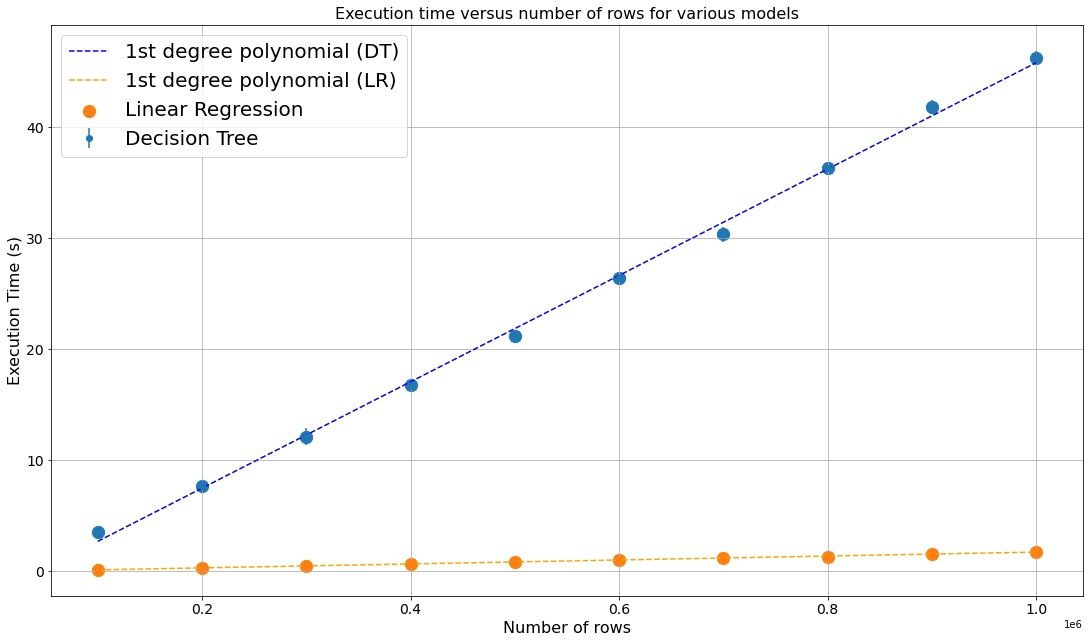

In [74]:
import matplotlib.patches as patches
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)



plt.scatter(x, y_mean, marker='o', s=150)
plt.errorbar(x, y_mean, y_stdev, linestyle='None', marker='o', label='Decision Tree')
plt.scatter(x, y_mean_linear, marker='o', label='Linear Regression', s=150) # mock up for second model
plt.errorbar(x, y_mean_linear , y_stdev_linear, linestyle='None', marker='o') # mock up for second model

# plt.scatter(x, y_mean)
_=plt.xlabel('Number of rows', fontsize=16)
_=plt.ylabel('Execution Time (s)', fontsize=16)
_=plt.title('Execution time versus number of rows for various models', fontsize=16)

## Add a linear fit for both models
x_synth = np.linspace(1, x[-1], 100)

coef = np.polyfit(x, y_mean, 1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(x, poly1d_fn(x), '--b', label='1st degree polynomial (DT)')

coef = np.polyfit(x, y_mean_linear, 1) # mock up model
poly1d_fn = np.poly1d(coef) 
_=plt.plot(x, poly1d_fn(x), '--', color='orange', label='1st degree polynomial (LR)')


# Plot styling
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc=2, prop={'size': 20})

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

_=plt.show()
